# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement

To explore creation of models that will predict the price of a house at sale. 

The data of individual residential properties sold in Ames, IA from 2006 to 2010 is provided on Kaggle as competition.

## Executive Summary

### Contents:
- [Data Import & Cleaning]
- [Exploratory Data Analysis]
- [Data Visualization]
- [Conclusions]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV,RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
sns.set_style('darkgrid')

## Data Importing & Cleaning

In [2]:
df=pd.read_csv('./datasets/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

#### Data Dictionary : Please refer to: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
#Formating column names
df.columns=[x.lower().replace(' ','_') for x in df.columns ]

In [6]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [7]:
df.isnull().sum().sort_values(ascending=False).head(27)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
overall_cond         0
dtype: int64

Chaning data types

In [8]:
df['bsmtfin_sf_1']=df['bsmtfin_sf_1'].astype('float64')

In [9]:
df[['1st_flr_sf','2nd_flr_sf','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','open_porch_sf',
       'enclosed_porch','gr_liv_area','bsmtfin_sf_1','bsmt_full_bath','bsmt_half_bath']]=df[['1st_flr_sf','2nd_flr_sf','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','open_porch_sf',
       'enclosed_porch','gr_liv_area','bsmtfin_sf_1','bsmt_full_bath','bsmt_half_bath']].astype('float64')

In [10]:
df['ms_subclass']=df['ms_subclass'].astype('object')

In [11]:
df.drop(columns=['pid','pool_qc','misc_feature','alley','fence'],inplace=True)

Dropping PID as there is no predictive values. Dropping pool qc, misc features, alley and fence as there are too many null values.

In [12]:
df.shape

(2051, 76)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 76 columns):
id                 2051 non-null int64
ms_subclass        2051 non-null object
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         2051 non-null object
roof_matl          2051 non-null object
exterior_1st      

Dropping gr liv area > 4000 as specified in special notes under http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [14]:
df.drop(df[df['gr_liv_area']>4000].index,inplace=True)

To fill the missing values 

In [15]:
df['lot_frontage'].median()

68.0

In [16]:
df['lot_frontage'].fillna('68.0', inplace=True)

Filling lot frontage with the median values.

In [17]:
df['lot_frontage']=df['lot_frontage'].astype('float64')

In [18]:
df[df['garage_finish'].isnull() & df['garage_type'].notnull()].loc[:,'garage_type':]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0.0,212.0,0,0,0,0,3,2007,WD,150909


In [19]:
df.loc[1712,'garage_type']=None

In [20]:
df.loc[1712,'garage_cars']=0

In [21]:
df.loc[1712,'garage_area']=0

Since there is only 1 value completed for garage, safe to assume there is is no garage instead. Changing these values to 0 or none.

In [22]:
df[df['bsmt_exposure'].isnull() & df['bsmt_cond'].notnull()].loc[:,'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,...,0.0,0.0,0,0,0,0,7,2007,New,212109
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,...,0.0,0.0,0,0,0,0,5,2010,WD,221500
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,...,96.0,0.0,0,0,0,0,2,2006,WD,192500


In [23]:
df.loc[1456,'bsmt_exposure']='No'

In [24]:
df.loc[1547,'bsmt_exposure']='No'

In [25]:
df.loc[1997,'bsmt_exposure']='No'

Changing 'Nan' bsmt exposure to No instead to be consistent with other values

In [26]:
df[df['bsmtfin_type_2'].isnull() & df['bsmt_cond'].notnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0,0,0,0,10,2009,WD,284000


In [27]:
df[df['bsmtfin_type_1']=='GLQ']['bsmtfin_type_2'].value_counts()

Unf    567
Rec     17
LwQ     11
ALQ     11
BLQ      6
Name: bsmtfin_type_2, dtype: int64

In [28]:
df.loc[1147,'bsmtfin_type_2']='Unf'

Changing bsmtfin type 2 to the mode for same type 1 of bsmtfin

In [29]:
df[df['bsmt_full_bath'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,...,372.0,0.0,0,0,0,0,7,2008,WD,284700
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0.0,0.0,0,0,0,0,4,2008,ConLD,79000


In [30]:
df.loc[616,'bsmt_full_bath']=0
df.loc[1327,'bsmt_full_bath']=0

Changing 'Nan' bsmt full bath to 0 instead to be consistent with other values

In [31]:
df[df['bsmt_half_bath'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,...,372.0,0.0,0,0,0,0,7,2008,WD,284700
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,...,0.0,0.0,0,0,0,0,4,2008,ConLD,79000


In [32]:
df.loc[616,'bsmt_half_bath']=0
df.loc[1327,'bsmt_half_bath']=0

Changing 'Nan' bsmt half bath to 0 instead to be consistent with other values

In [33]:
df[df['bsmtfin_sf_2'].isnull() & df['total_bsmt_sf'].isnull()].loc[:,'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,...,0.0,0.0,0,0,0,0,4,2008,ConLD,79000


In [34]:
df.loc[1327,['bsmtfin_sf_2','bsmt_unf_sf','bsmtfin_sf_1','total_bsmt_sf']]=0

Changing 'Nan' bsmt sf values to 0 instead to be consistent with other values

In [35]:
ind2=df[df['mas_vnr_area'].isnull()].index

In [36]:
for x in ind2:
    df.loc[x,'mas_vnr_area']=0

Changing 'Nan' mas vnr area to 0 instead to be consistent with other values

In [37]:
df['mas_vnr_type'].fillna('None',inplace=True)

In [38]:
df.max()

id                    2930
ms_subclass            190
ms_zoning               RM
lot_frontage           313
lot_area            159000
street                Pave
lot_shape              Reg
land_contour           Lvl
utilities           NoSewr
lot_config          Inside
land_slope             Sev
neighborhood       Veenker
condition_1           RRNn
condition_2           RRNn
bldg_type           TwnhsE
house_style           SLvl
overall_qual            10
overall_cond             9
year_built            2010
year_remod/add        2010
roof_style            Shed
roof_matl          WdShngl
exterior_1st       WdShing
exterior_2nd       Wd Shng
mas_vnr_type         Stone
mas_vnr_area          1600
exter_qual              TA
exter_cond              TA
foundation            Wood
bsmtfin_sf_1          2188
                    ...   
electrical           SBrkr
1st_flr_sf            3820
2nd_flr_sf            1862
low_qual_fin_sf       1064
gr_liv_area           3820
bsmt_full_bath           3
b

In [39]:
df.min()

id                       1
ms_subclass             20
ms_zoning          A (agr)
lot_frontage            21
lot_area              1300
street                Grvl
lot_shape              IR1
land_contour           Bnk
utilities           AllPub
lot_config          Corner
land_slope             Gtl
neighborhood       Blmngtn
condition_1         Artery
condition_2         Artery
bldg_type             1Fam
house_style         1.5Fin
overall_qual             1
overall_cond             1
year_built            1872
year_remod/add        1950
roof_style            Flat
roof_matl          CompShg
exterior_1st       AsbShng
exterior_2nd       AsbShng
mas_vnr_type        BrkCmn
mas_vnr_area             0
exter_qual              Ex
exter_cond              Ex
foundation          BrkTil
bsmtfin_sf_1             0
                    ...   
electrical           FuseA
1st_flr_sf             334
2nd_flr_sf               0
low_qual_fin_sf          0
gr_liv_area            334
bsmt_full_bath           0
b

Checking for Max and min values.

In [40]:
df[df['garage_yr_blt']==2207][['year_built','year_remod/add','garage_yr_blt','garage_cars','garage_area']]

,year_built,year_remod/add,garage_yr_blt,garage_cars,garage_area
1699,2006,2007,2207.0,2.0,502.0


In [41]:
df.loc[1699,'garage_yr_blt']=2007.0

Since year_remod/add is 2007, safe to assume 2207 is typo.

Changing ordinal feactures to numeric.

In [42]:
df.select_dtypes(include = [object]).columns

Index(['ms_subclass', 'ms_zoning', 'street', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'sale_type'],
      dtype='object')

In [43]:
for i in df.select_dtypes(include = [object]).columns:
    print ('{}:{}'.format(i,df[i].unique()))

ms_subclass:[60 20 50 180 160 70 120 190 85 30 90 80 75 45 40 150]
ms_zoning:['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
street:['Pave' 'Grvl']
lot_shape:['IR1' 'Reg' 'IR2' 'IR3']
land_contour:['Lvl' 'HLS' 'Bnk' 'Low']
utilities:['AllPub' 'NoSeWa' 'NoSewr']
lot_config:['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
land_slope:['Gtl' 'Sev' 'Mod']
neighborhood:['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
condition_1:['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
condition_2:['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
bldg_type:['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
house_style:['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
roof_style:['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
roof_matl:

In [44]:
df['lot_shape'].replace({'IR1':2, 'Reg':3, 'IR2':1, 'IR3':0},inplace=True);

In [45]:
df['utilities'].replace({'AllPub':3, 'NoSeWa':1, 'NoSewr':2, 'ELO':0},inplace=True);

In [46]:
df['land_slope'].replace({'Gtl':2, 'Sev':0, 'Mod':1},inplace=True);

In [47]:
df['exter_qual'].replace({'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Po':0},inplace=True);

In [48]:
df['exter_cond'].replace({'TA':2, 'Gd':3, 'Fa':1, 'Ex':4, 'Po':0},inplace=True);

In [49]:
df['bsmt_qual'].replace({'TA':3, 'Gd':4, 'Fa':2, None:0, 'Ex':5, 'Po':1},inplace=True);

In [50]:
df['bsmt_cond'].replace({'TA':3, 'Gd':4, 'Fa':2, None:0, 'Ex':5, 'Po':1},inplace=True);

In [51]:
df['bsmt_exposure'].replace({'No':1, 'Gd':4, 'Av':3, None:0, 'Mn':2},inplace=True);

In [52]:
df['bsmtfin_type_1'].replace({'GLQ':6, 'Unf':1, 'ALQ':5, 'Rec':3, None:0, 'BLQ':4, 'LwQ':2},inplace=True);

In [53]:
df['bsmtfin_type_2'].replace({'GLQ':6, 'Unf':1, 'ALQ':5, 'Rec':3, None:0, 'BLQ':4, 'LwQ':2},inplace=True);

In [54]:
df['heating_qc'].replace({'TA':2, 'Gd':3, 'Fa':1, 'Ex':4, 'Po':0},inplace=True);

In [55]:
df['electrical'].replace({'SBrkr':4, 'FuseF':2, 'FuseA':3, 'FuseP':1, 'Mix':0},inplace=True);

In [56]:
df['kitchen_qual'].replace({'Gd':3, 'TA':2, 'Fa':1, 'Ex':4, 'Po':0},inplace=True);

In [57]:
df['functional'].replace({'Typ':7, 'Mod':4, 'Min2':5, 'Maj1':3, 'Min1':6, 'Sev':0, 'Sal':1, 'Maj2':2},inplace=True);

In [58]:
df['fireplace_qu'].replace({None:0, 'TA':3, 'Gd':4, 'Po':1, 'Ex':5, 'Fa':2},inplace=True);

In [59]:
df['garage_finish'].replace({'RFn':2, 'Unf':1, 'Fin':3, None:0},inplace=True);

In [60]:
df['garage_qual'].replace({'TA':3, 'Gd':4, 'Fa':2, None:0, 'Ex':5, 'Po':1},inplace=True);

In [61]:
df['garage_cond'].replace({'TA':3, 'Gd':4, 'Fa':2, None:0, 'Ex':5, 'Po':1},inplace=True);

In [62]:
df['paved_drive'].replace({'Y':2, 'N':0, 'P':1},inplace=True);

Perform data cleaning on test dataset.

In [63]:
df_test=pd.read_csv('./datasets/test.csv')

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [65]:
df_test.columns=[x.lower().replace(' ','_') for x in df_test.columns ]

In [66]:
df_test.isnull().sum().sort_values(ascending=False).head(20)

pool_qc           875
misc_feature      838
alley             821
fence             707
fireplace_qu      422
lot_frontage      160
garage_cond        45
garage_qual        45
garage_yr_blt      45
garage_finish      45
garage_type        44
bsmt_exposure      25
bsmtfin_type_1     25
bsmt_qual          25
bsmtfin_type_2     25
bsmt_cond          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
overall_cond        0
dtype: int64

In [67]:
df_test['bsmtfin_sf_1']=df_test['bsmtfin_sf_1'].astype('float64')

In [68]:
df_test[['1st_flr_sf','2nd_flr_sf','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','open_porch_sf',
       'enclosed_porch','gr_liv_area','bsmtfin_sf_1','bsmt_full_bath','bsmt_half_bath']]=df_test[['1st_flr_sf','2nd_flr_sf','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','open_porch_sf',
       'enclosed_porch','gr_liv_area','bsmtfin_sf_1','bsmt_full_bath','bsmt_half_bath']].astype('float64')

In [69]:
df_test['ms_subclass']=df_test['ms_subclass'].astype('object')

In [70]:
df_test.drop(columns=['pid','pool_qc','misc_feature','alley','fence'],inplace=True)

In [71]:
df_test['lot_frontage'].fillna('68.0', inplace=True)

Filling none values with the same median 68.

In [72]:
df_test[df_test['mas_vnr_type'].isnull()].loc[:,'mas_vnr_type':]

,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
866,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,...,0,48.0,0.0,0,0,0,0,11,2009,WD


In [73]:
df_test.loc[866,'mas_vnr_type']=None

In [74]:
df_test.loc[866,'mas_vnr_area']=0

Since there is no mas, to update the values to none and 0 accordingly.

In [75]:
df_test[df_test['bsmtfin_type_2'].isnull() & df_test['bsmtfin_type_1'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']].fillna('NA',inplace=True)

In [76]:
df_test[df_test['electrical'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
635,1578,80,RL,73,9735,Pave,Reg,Lvl,AllPub,Inside,...,100,0.0,0.0,0,0,0,0,5,2008,WD


In [77]:
df_test['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [78]:
df_test.loc[635,'electrical']='SBrkr'

Updating the missing value to the mode of electrical type.

Changing ordinal feactures to numeric.

In [79]:
df_test['lot_shape'].replace({'IR1':2, 'Reg':3, 'IR2':1, 'IR3':0},inplace=True);

In [80]:
df_test['utilities'].replace({'AllPub':3, 'NoSeWa':1, 'NoSewr':2, 'ELO':0},inplace=True);

In [81]:
df_test['land_slope'].replace({'Gtl':2, 'Sev':0, 'Mod':1},inplace=True);

In [82]:
df_test['exter_qual'].replace({'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Po':0},inplace=True);

In [83]:
df_test['exter_cond'].replace({'TA':2, 'Gd':3, 'Fa':1, 'Ex':4, 'Po':0},inplace=True);

In [84]:
df_test['bsmt_qual'].replace({'TA':3, 'Gd':4, 'Fa':2, None:0, 'Ex':5, 'Po':1},inplace=True);

In [85]:
df_test['bsmt_cond'].replace({'TA':3, 'Gd':4, 'Fa':2, None:0, 'Ex':5, 'Po':1},inplace=True);

In [86]:
df_test['bsmt_exposure'].replace({'No':1, 'Gd':4, 'Av':3, None:0, 'Mn':2},inplace=True);

In [87]:
df_test['bsmtfin_type_1'].replace({'GLQ':6, 'Unf':1, 'ALQ':5, 'Rec':3, None:0, 'BLQ':4, 'LwQ':2},inplace=True);

In [88]:
df_test['bsmtfin_type_2'].replace({'GLQ':6, 'Unf':1, 'ALQ':5, 'Rec':3, None:0, 'BLQ':4, 'LwQ':2},inplace=True);

In [89]:
df_test['heating_qc'].replace({'TA':2, 'Gd':3, 'Fa':1, 'Ex':4, 'Po':0},inplace=True);

In [90]:
df_test['electrical'].replace({'SBrkr':4, 'FuseF':2, 'FuseA':3, 'FuseP':1, 'Mix':0},inplace=True);

In [91]:
df_test['kitchen_qual'].replace({'Gd':3, 'TA':2, 'Fa':1, 'Ex':4,'Po':0},inplace=True);

In [92]:
df_test['functional'].replace({'Typ':7, 'Mod':4, 'Min2':5, 'Maj1':3, 'Min1':6, 'Sev':0, 'Sal':1, 'Maj2':2},inplace=True);

In [93]:
df_test['fireplace_qu'].replace({None:0, 'TA':3, 'Gd':4, 'Po':1, 'Ex':5, 'Fa':2},inplace=True);

In [94]:
df_test['garage_finish'].replace({'RFn':2, 'Unf':1, 'Fin':3, None:0},inplace=True);

In [95]:
df_test['garage_qual'].replace({'TA':3, 'Gd':4, 'Fa':2, None:0, 'Ex':5, 'Po':1},inplace=True);

In [96]:
df_test['garage_cond'].replace({'TA':3, 'Gd':4, 'Fa':2, None:0, 'Ex':5, 'Po':1},inplace=True);

In [97]:
df_test['paved_drive'].replace({'Y':2, 'N':0, 'P':1},inplace=True);

Before combining the dataset, to have a column to differiate the data.

In [98]:
df['dataset']='train'

In [99]:
df.shape

(2049, 77)

In [100]:
df_test['dataset']='test'

In [101]:
df_test.shape

(879, 76)

Combining the dataset for get_dummries on categorical nomial values.

In [102]:
df_final=pd.concat([df,df_test],join='outer',sort=False)

In [103]:
df_final.shape

(2928, 77)

In [104]:
df_final.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,dataset
0,109,60,RL,68,13517,Pave,2,Lvl,3,CulDSac,...,0.0,0,0,0,0,3,2010,WD,130500.0,train
1,544,60,RL,43,11492,Pave,2,Lvl,3,CulDSac,...,0.0,0,0,0,0,4,2009,WD,220000.0,train
2,153,20,RL,68,7922,Pave,3,Lvl,3,Inside,...,0.0,0,0,0,0,1,2010,WD,109000.0,train
3,318,60,RL,73,9802,Pave,3,Lvl,3,Inside,...,0.0,0,0,0,0,4,2010,WD,174000.0,train
4,255,50,RL,82,14235,Pave,2,Lvl,3,Inside,...,0.0,0,0,0,0,3,2010,WD,138500.0,train


In [105]:
df_final['dataset'].value_counts()

train    2049
test      879
Name: dataset, dtype: int64

In [106]:
df_final=pd.get_dummies(df_final,columns=['ms_subclass','ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood',
       'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'foundation', 'heating','central_air','garage_type', 'sale_type'])

In [107]:
df_final.shape

(2928, 230)

Spliting the dataset again for further regression / data exploration.

In [108]:
df_train=df_final[df_final['dataset']=='train']

In [109]:
df_train.shape

(2049, 230)

In [110]:
df_final_test=df_final[df_final['dataset']=='test']

In [111]:
df_final_test.shape

(879, 230)

Wish to explore with almost all the columns as features and putting this into regression and form a model.

In [112]:
features=[col for col in df_train.columns if (col !='id' and col !='saleprice' and col !='garage_yr_blt' and col !='dataset')]
X=df_train[features]
y=df_train['saleprice']

ID and dataset do not have any predictive value while garage year built have missing values and hence not including in model. Saleprice is our target variable.

In [113]:
X.shape

(2049, 226)

Spliting our data into training and testing set.

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

Scaing out X train and X test set.

In [115]:
ss=StandardScaler()
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

In [116]:
X_test.shape

(513, 226)

Instantiate and fitting models

In [117]:
lr=LinearRegression()

In [118]:
lasso=LassoCV(alphas=np.logspace(0, 5, 200))

In [119]:
ridge=RidgeCV(alphas=np.linspace(.1,10,100))

In [120]:
lr_scores=cross_val_score(lr,X_train,y_train,cv=10)
lr_scores.mean()

-6.607311107355591e+21

In [121]:
lasso_scores=cross_val_score(lasso,X_train,y_train,cv=10)
lasso_scores.mean()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warni

0.9036841050076045

In [122]:
ridge_scores=cross_val_score(ridge,X_train,y_train,cv=10)
ridge_scores.mean()

0.8948876770593619

knn model score: 0.8196521715358053<br>
LinearRegression score:-6.607311107355591e+21<br>
Lasso model score: 0.9036966650188611<br>
Ridge model score: 0.8948876770593619<br>

Lasso model is selected as our model due to highest score.

In [123]:
lasso.fit(X_train,y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [124]:
lasso.alpha_

488.02515836544336

In [125]:
lasso.score(X_train,y_train)

0.9242410902093809

In [126]:
lasso.score(X_test,y_test)

0.9186511998200185

In [127]:
pred=lasso.predict(X_test)

In [128]:
r2_score(y_test,pred)

0.9186511998200185

Above scores show good r2 score for our training and testing set.

In [129]:
def adjustedr2(y,r2):
    return 1-(((1-r2)*((y.shape[0])-1))/((y.shape[0])-(y.shape[1])-1))

In [130]:
adjustedr2(X_test,lasso.score(X_test,y_test))

0.8543685814959772

In [131]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

22678.10473123901

Root mean squared error is 22678.10473123901.

Looking into our model coef for the features.

In [132]:
lassodf=pd.DataFrame(lasso.coef_,index=features,columns=['Coeff'])

In [133]:
lassodf['Coeff'].sort_values(ascending=False)

gr_liv_area             24281.860164
overall_qual            11971.843139
bsmtfin_sf_1             9416.465853
total_bsmt_sf            7725.072503
year_built               7576.990782
neighborhood_NridgHt     7244.646429
exter_qual               6021.431283
neighborhood_StoneBr     5787.783227
sale_type_New            5719.081550
kitchen_qual             4972.194898
mas_vnr_area             4695.857862
bsmt_exposure            4316.192288
lot_area                 4139.411137
overall_cond             4098.632441
neighborhood_NoRidge     3514.563621
bldg_type_1Fam           3466.376688
screen_porch             3315.437207
functional               3154.774730
garage_area              3006.668465
land_contour_HLS         2821.451615
neighborhood_GrnHill     2734.731030
roof_matl_WdShngl        2289.872673
roof_style_Hip           2135.741878
neighborhood_Crawfor     2014.817618
exterior_1st_BrkFace     2003.545458
lot_frontage             1903.671208
condition_1_Norm         1547.038385
c

In [134]:
lassodf[lassodf['Coeff']!=0].count()

Coeff    106
dtype: int64

Model is using 104 features to predict the sale price.

In [135]:
residuals=y_test-pred

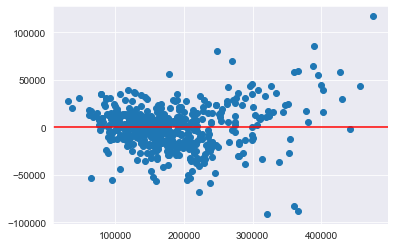

In [136]:
plt.scatter(pred,residuals)
plt.axhline(c='r')

Homoscedasticity of residuals is shown.

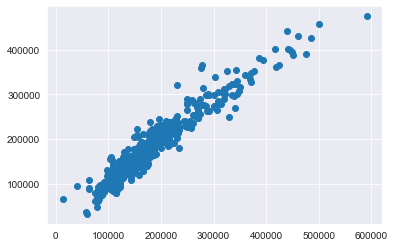

In [137]:
plt.scatter(y_test,pred)

Using the model to predict the saleprice in Test dataset.

In [138]:
LassoCV(n_alphas=200)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [139]:
features=[col for col in df_final_test.columns if (col !='id' and col !='saleprice' and col !='garage_yr_blt' and col !='dataset')]
X_final_test=df_final_test[features]

In [140]:
X_final_train=ss.transform(X_final_test)

In [141]:
pred_test=lasso.predict(X_final_train)

In [142]:
pred_test.shape

(879,)

In [143]:
df_final_test['Saleprice']=pred_test

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
kaggle=df_final_test[['id','Saleprice']]

In [145]:
pwd

'/Users/jiaxing/GA/classes-workarea/Project1234/Project2'

In [146]:
kaggle_export=kaggle.to_csv(r'/Users/jiaxing/GA/classes-workarea/Project1234/Project2/kaggle.csv',index=False)

Obtained a Kaggle score: 28251.73698. However this model uses 106 features and remains a highly complex model. Further exploration of data and feature engineering could be required.

### Feature Engineering / EDA

Investigating the correlations of features with saleprice.

In [147]:
abs(df_train.corr()['saleprice']).sort_values(ascending=False).head(60)

saleprice               1.000000
overall_qual            0.803462
gr_liv_area             0.719463
total_bsmt_sf           0.665116
garage_area             0.655097
1st_flr_sf              0.648252
garage_cars             0.648227
bsmt_qual               0.613236
year_built              0.572405
garage_finish           0.558566
year_remod/add          0.550872
garage_yr_blt           0.541553
fireplace_qu            0.539484
full_bath               0.538225
foundation_PConc        0.529500
mas_vnr_area            0.511273
totrms_abvgrd           0.509775
fireplaces              0.473783
neighborhood_NridgHt    0.448639
bsmtfin_sf_1            0.446103
bsmt_exposure           0.427209
mas_vnr_type_None       0.411630
garage_type_Detchd      0.370280
sale_type_New           0.360599
garage_type_Attchd      0.358104
ms_subclass_60          0.356092
foundation_CBlock       0.355768
bsmtfin_type_1          0.350728
exterior_1st_VinylSd    0.342156
open_porch_sf           0.338545
exterior_2

In [148]:
df_train.corr()['gr_liv_area'].sort_values(ascending=False).head(10)

gr_liv_area       1.000000
totrms_abvgrd     0.812129
saleprice         0.719463
2nd_flr_sf        0.655866
full_bath         0.630462
overall_qual      0.564933
1st_flr_sf        0.530279
bedroom_abvgr     0.526196
ms_subclass_60    0.496029
garage_cars       0.493368
Name: gr_liv_area, dtype: float64

Will like to investigate some of these features with high correlation with saleprice.

Created new column for total living area. Buyers will be interested to know the total sq feet of the house.

In [149]:
df_train['total_living_area']=(df_train['gr_liv_area'])+(df_train['total_bsmt_sf'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
df_final_test['total_living_area']=df_test['gr_liv_area']+df_test['total_bsmt_sf']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


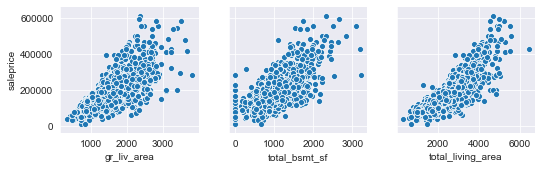

In [151]:
sns.pairplot(df_train,x_vars=['gr_liv_area','total_bsmt_sf','total_living_area'],y_vars=['saleprice'])

We will be able to see the higher correlation for total living area vs saleprice.

In [152]:
df_train.corr()['total_living_area'].sort_values(ascending=False).head(20)

total_living_area    1.000000
gr_liv_area          0.861643
saleprice            0.825818
total_bsmt_sf        0.816296
1st_flr_sf           0.775627
overall_qual         0.665588
totrms_abvgrd        0.663360
full_bath            0.586403
garage_area          0.569735
garage_cars          0.561923
bsmt_qual            0.538599
fireplace_qu         0.497937
fireplaces           0.464601
mas_vnr_area         0.438881
garage_finish        0.429448
year_built           0.397340
bsmt_unf_sf          0.395825
foundation_PConc     0.389372
garage_yr_blt        0.387210
year_remod/add       0.380169
Name: total_living_area, dtype: float64

In [153]:
df_train.corr()['overall_qual'].sort_values(ascending=False).head(10)

overall_qual         1.000000
saleprice            0.803462
total_living_area    0.665588
bsmt_qual            0.652878
year_built           0.602376
garage_cars          0.587441
year_remod/add       0.584080
garage_yr_blt        0.580666
foundation_PConc     0.570569
gr_liv_area          0.564933
Name: overall_qual, dtype: float64

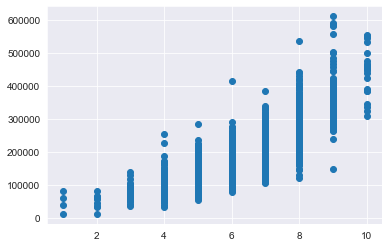

In [154]:
plt.scatter(df_train['overall_qual'],df_train['saleprice'])

Overall qual is more correlated to saleprice than bsmt qual to saleprice. Higher score will command higher saleprice.

In [155]:
df_train.corr()['garage_area'].sort_values(ascending=False).head(10)

garage_area          1.000000
garage_cars          0.897310
saleprice            0.655097
total_living_area    0.569735
garage_yr_blt        0.564272
garage_qual          0.563592
overall_qual         0.559897
garage_cond          0.547269
garage_finish        0.515792
1st_flr_sf           0.489472
Name: garage_area, dtype: float64

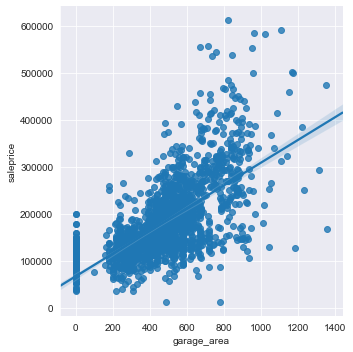

In [156]:
sns.lmplot(x='garage_area',y='saleprice',data=df_train)

Garage area have a high correlation with saleprice. It also have a high corr with garage car. This is normal as bigger area will also mean more cars can be parked. Some outliers can be observed.

Checking if there is any error in 0 garage cars vs 0 garage area.

In [157]:
df_train[df_train['garage_cars']==0]['garage_area'].value_counts()

0.0    114
Name: garage_area, dtype: int64

In [158]:
df_train.corr()['saleprice'].sort_values(ascending=False).head(10)

saleprice            1.000000
total_living_area    0.825818
overall_qual         0.803462
gr_liv_area          0.719463
total_bsmt_sf        0.665116
garage_area          0.655097
1st_flr_sf           0.648252
garage_cars          0.648227
bsmt_qual            0.613236
year_built           0.572405
Name: saleprice, dtype: float64

Slightly better correlation with saleprice for interaction garage area and car.

In [159]:
df_train.corr()['year_remod/add'].sort_values(ascending=False).head(10)

year_remod/add          1.000000
garage_yr_blt           0.683411
year_built              0.628613
foundation_PConc        0.608017
overall_qual            0.584080
saleprice               0.550872
bsmt_qual               0.540344
exterior_1st_VinylSd    0.508830
exterior_2nd_VinylSd    0.504281
full_bath               0.471130
Name: year_remod/add, dtype: float64

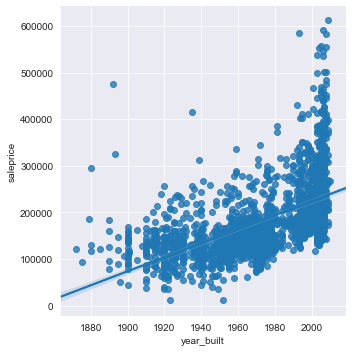

In [160]:
sns.lmplot(x='year_built',y='saleprice',data=df_train)

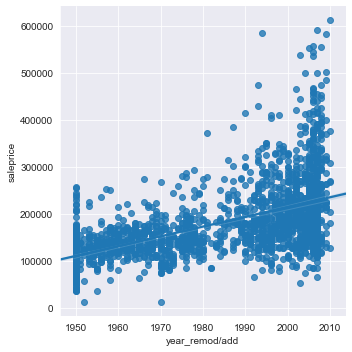

In [161]:
sns.lmplot(x='year_remod/add',y='saleprice',data=df_train)

Houses built or remod recently will have higher saleprices. Even though year house remod have a lower correlation vs saleprice, it will reflect the more recent year that it was either built or remodel. Moreover there is also another column with sale type which will indicate if the house is sold new. Garage year bult will either be the same or older than the year remodelled.

In [162]:
df_train.corr()['fireplace_qu'].sort_values(ascending=False).head(10)

fireplace_qu         1.000000
fireplaces           0.860785
saleprice            0.539484
total_living_area    0.497937
gr_liv_area          0.480848
overall_qual         0.479610
1st_flr_sf           0.397555
garage_finish        0.394641
garage_cars          0.377203
total_bsmt_sf        0.347501
Name: fireplace_qu, dtype: float64

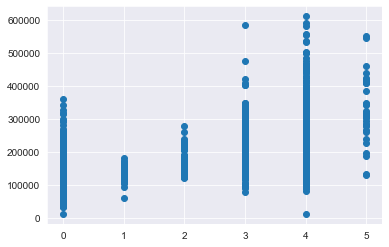

In [163]:
plt.scatter(x='fireplace_qu',y='saleprice',data=df_train)

Fireplace quality have a higher correlation vs saleprice than fireplaces. It is also highly correlated with fireplaces. Generally, a higher score on fireplace quality will have higher sale price. This is observed with higher saleprice for fireplace quality 4.

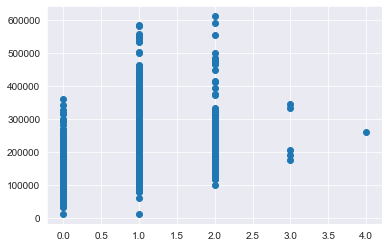

In [164]:
plt.scatter(df_train['fireplaces'],df_train['saleprice'])

In [165]:
df_train['fireplaces'].value_counts()

0    1000
1     898
2     145
3       5
4       1
Name: fireplaces, dtype: int64

Above plot shows that more fireplace does not equal to higher salprice. Houses with 1 fireplace have high saleprice spread.

In [166]:
df_train.corr()['full_bath'].sort_values(ascending=False).head(10)

full_bath            1.000000
gr_liv_area          0.630462
total_living_area    0.586403
saleprice            0.538225
totrms_abvgrd        0.521865
overall_qual         0.515052
garage_yr_blt        0.509872
year_built           0.479743
year_remod/add       0.471130
foundation_PConc     0.469601
Name: full_bath, dtype: float64

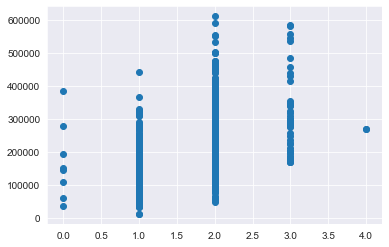

In [167]:
plt.scatter(df_train['full_bath'],df_train['saleprice'])

Generally, more full bath will command higher saleprice.

In [168]:
df_train.corr()['mas_vnr_area'].sort_values(ascending=False).head(10)

mas_vnr_area            1.000000
mas_vnr_type_BrkFace    0.608165
saleprice               0.511273
total_living_area       0.438881
overall_qual            0.423650
total_bsmt_sf           0.378057
garage_area             0.369940
gr_liv_area             0.360762
1st_flr_sf              0.358599
garage_cars             0.356357
Name: mas_vnr_area, dtype: float64

<Figure size 1800x1080 with 0 Axes>

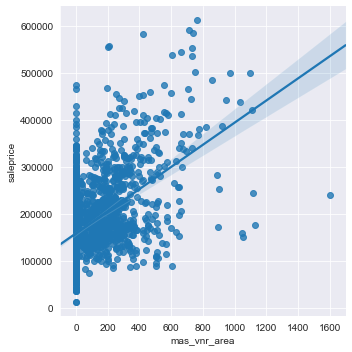

In [169]:
plt.figure(figsize=(25,15))
sns.lmplot(x='mas_vnr_area',y='saleprice',data=df_train)

There is some linear correlation with sale price. However the points are quite clustered with some even without mas but have great varition in price. Over half of our train set do not have mas.

In [170]:
df_train.corr()['garage_finish'].sort_values(ascending=False).head(10)

garage_finish    1.000000
year_built       0.598337
garage_cars      0.576464
saleprice        0.558566
overall_qual     0.553356
garage_yr_blt    0.527358
garage_area      0.515792
garage_qual      0.489983
bsmt_qual        0.485891
garage_cond      0.484540
Name: garage_finish, dtype: float64

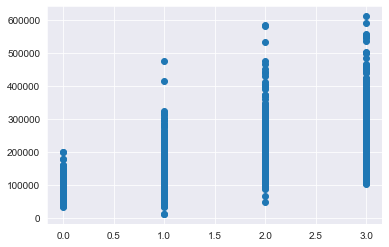

In [171]:
plt.scatter(df_train['garage_finish'],df_train['saleprice'])

Garage finish shows that higher finish may command higher saleprice.

In [172]:
df_train.corr()['foundation_PConc'].sort_values(ascending=False).head(10)

foundation_PConc        1.000000
garage_yr_blt           0.684339
year_built              0.666117
year_remod/add          0.608017
overall_qual            0.570569
exterior_1st_VinylSd    0.569420
bsmt_qual               0.566954
exterior_2nd_VinylSd    0.562468
saleprice               0.529500
full_bath               0.469601
Name: foundation_PConc, dtype: float64

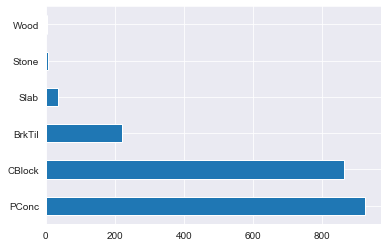

In [173]:
df['foundation'].value_counts().plot(kind='barh')

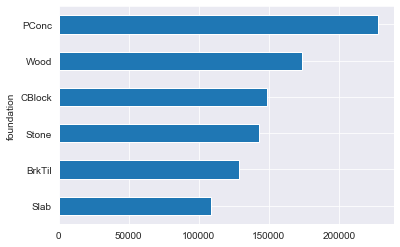

In [174]:
df.groupby('foundation')['saleprice'].mean().sort_values().plot(kind='barh')

Cblock and pcone is the most popular foundation types. However despite foundation of pcone and cblock being close in value counts, their mean price show much difference. Pcone foundation is able to fetch higher price.

In [175]:
df_train.corr()['totrms_abvgrd'].sort_values(ascending=False).head(10)

totrms_abvgrd         1.000000
gr_liv_area           0.812129
bedroom_abvgr         0.665009
total_living_area     0.663360
2nd_flr_sf            0.581356
full_bath             0.521865
saleprice             0.509775
ms_subclass_60        0.439422
house_style_2Story    0.413777
overall_qual          0.375268
Name: totrms_abvgrd, dtype: float64

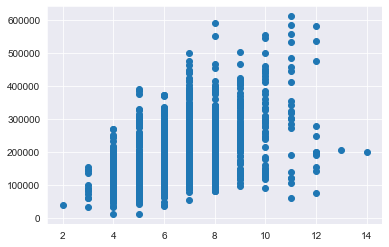

In [176]:
plt.scatter(df_train['totrms_abvgrd'],df_train['saleprice'])

Total rooms is highly correlated with other features like gr_live area. This correlation is natural as with more sq feet would meant more rooms could be built. However when considering a house, number of rooms will play a part, especially for large families.

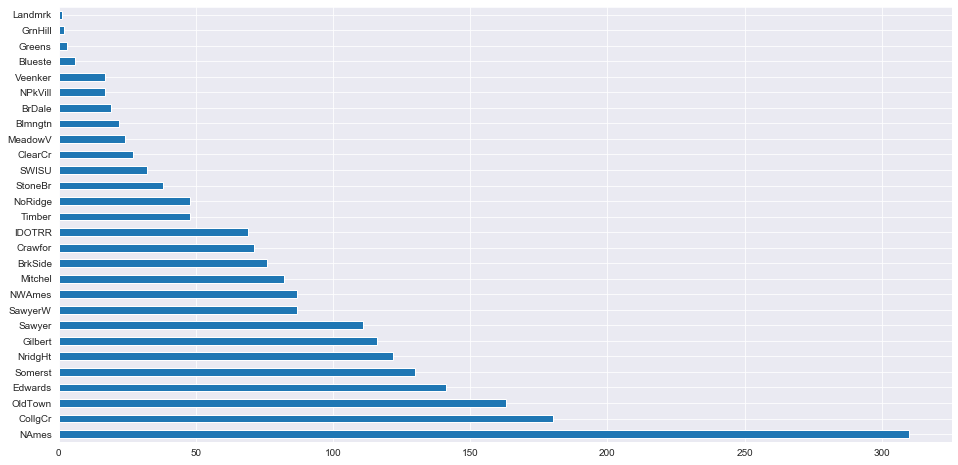

In [177]:
df['neighborhood'].value_counts().plot(kind='barh',figsize=(16,8))

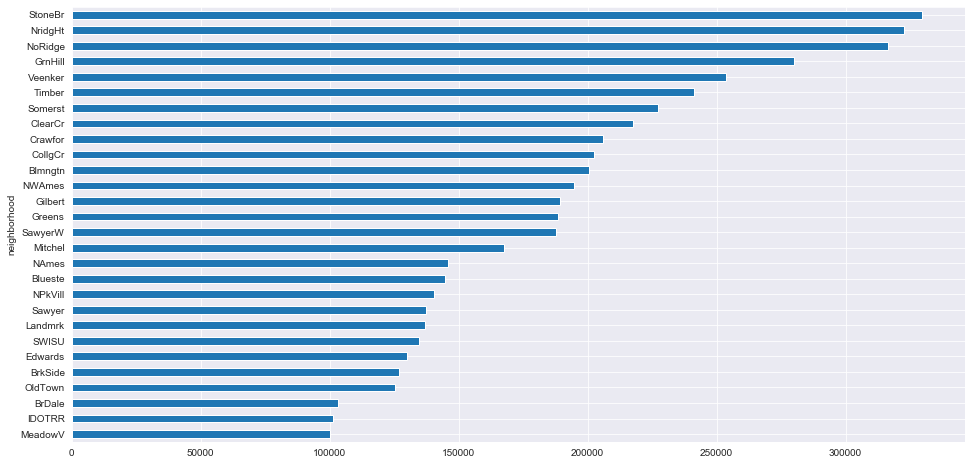

In [178]:
df.groupby('neighborhood')['saleprice'].mean().sort_values().plot(kind='barh',figsize=(16,8))

Some neighborhood are able to command higher saleprice.

In [179]:
df_train.corr()['bsmt_exposure'].sort_values(ascending=False).head(10)

bsmt_exposure        1.000000
bsmt_qual            0.440450
saleprice            0.427209
total_bsmt_sf        0.406884
bsmtfin_sf_1         0.387602
overall_qual         0.357690
bsmtfin_type_1       0.351158
1st_flr_sf           0.330221
total_living_area    0.324214
bsmt_full_bath       0.323420
Name: bsmt_exposure, dtype: float64

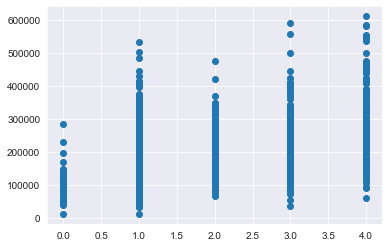

In [180]:
plt.scatter(df_train['bsmt_exposure'],df_train['saleprice'])

Even though there is correlation with saleprice, the plot shows that even with a score of 4, the saleprice can still varies quite a lot and do not command significantly higher saleprice.

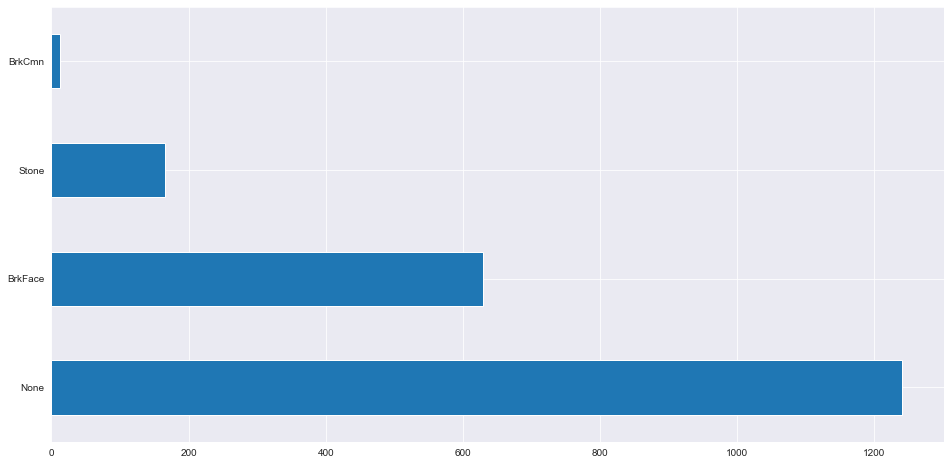

In [181]:
df['mas_vnr_type'].value_counts().plot(kind='barh',figsize=(16,8))

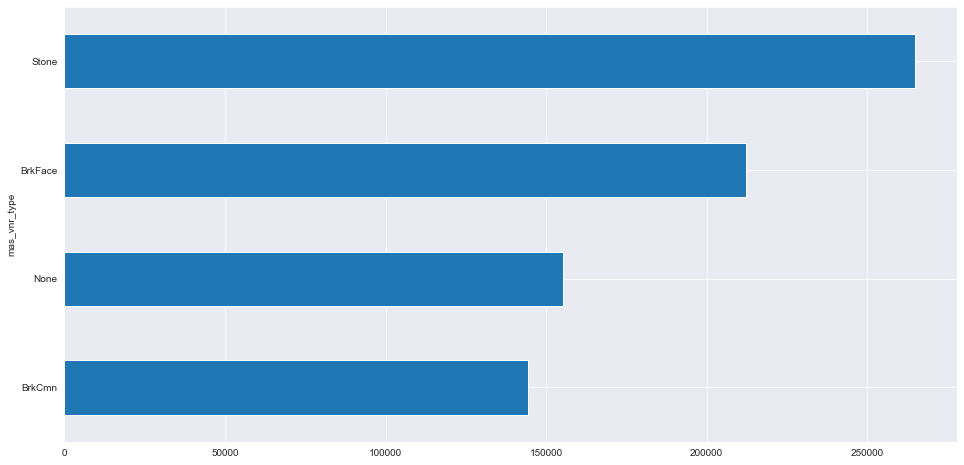

In [182]:
df.groupby('mas_vnr_type')['saleprice'].mean().sort_values().plot(kind='barh',figsize=(16,8))

More than half of the train dataset do not have mas. Those who did command a higher saleprice.

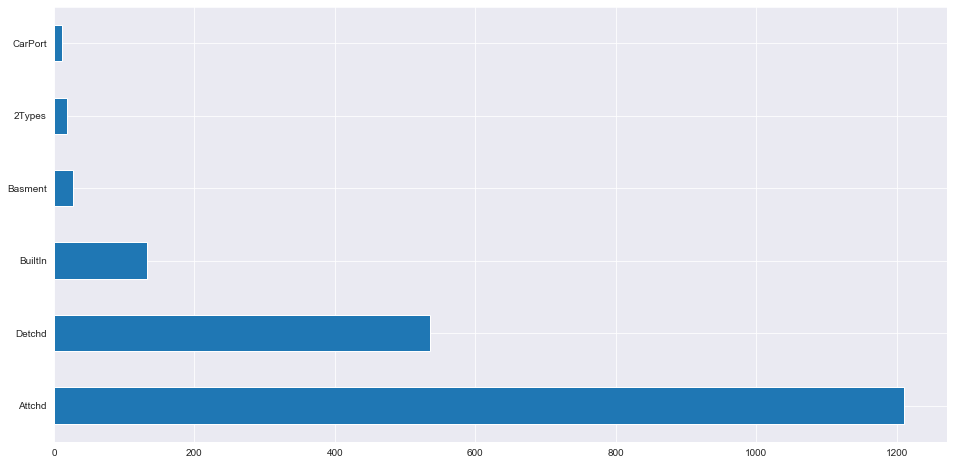

In [183]:
df['garage_type'].value_counts().plot(kind='barh',figsize=(16,8))

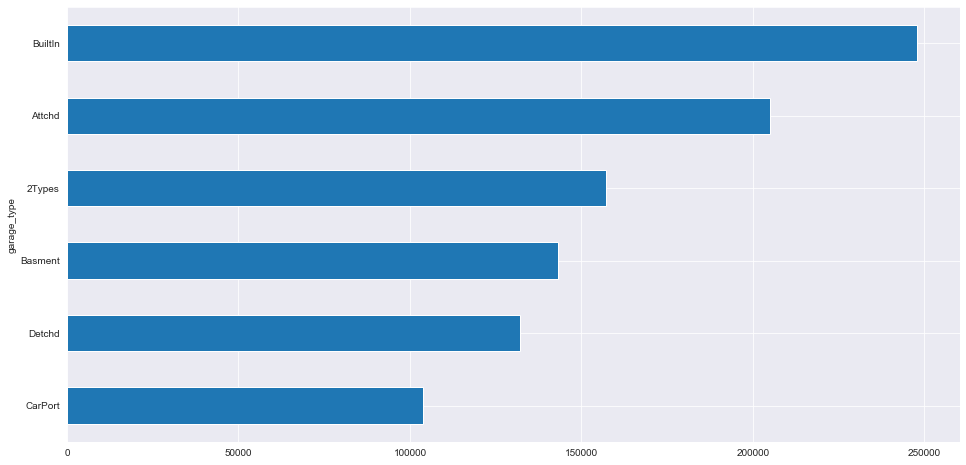

In [184]:
df.groupby('garage_type')['saleprice'].mean().sort_values().plot(kind='barh',figsize=(16,8))

Detched garage being the second highest count have the 2nd lowest mean price. Clearly there are preference for garage which are connected to the house itself and could resulted in higher saleprice.

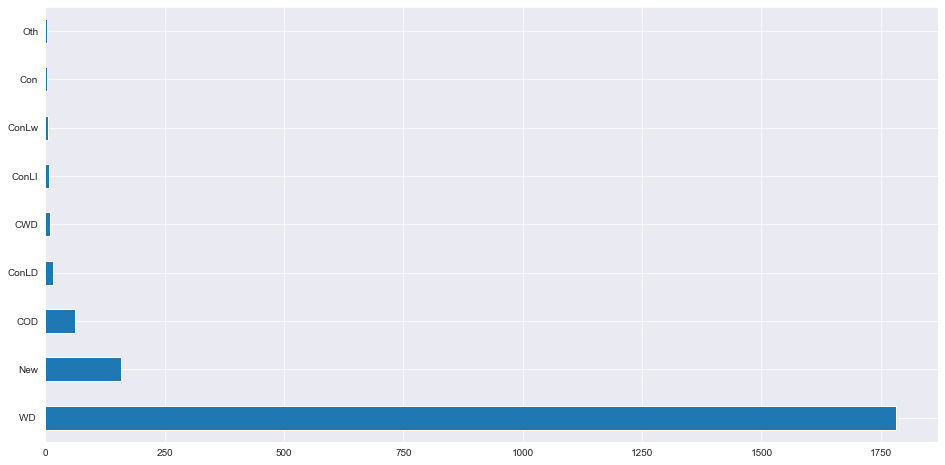

In [185]:
df['sale_type'].value_counts().plot(kind='barh',figsize=(16,8))

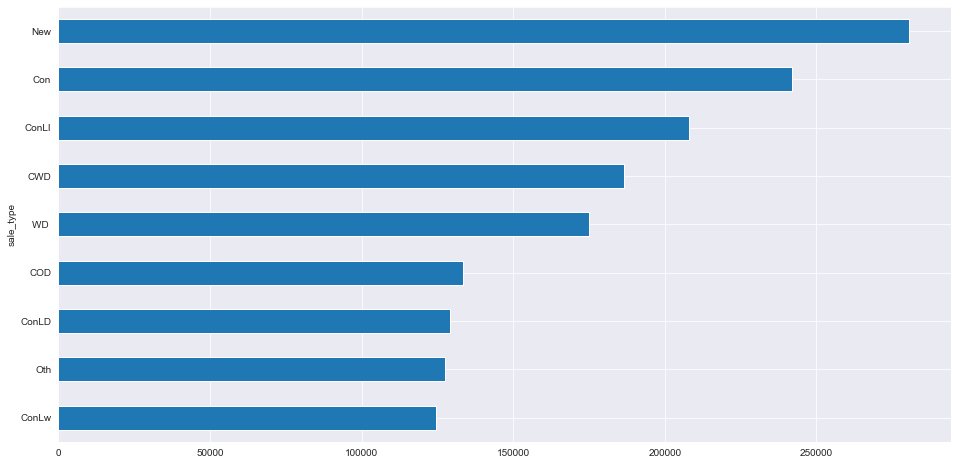

In [186]:
df.groupby('sale_type')['saleprice'].mean().sort_values().plot(kind='barh',figsize=(16,8))

Warranty Deed - Conventional occupies huge proportion of the train data set. New sales are lesser but commands higher sale price. New sales are dependent on number of houses being bulit in recent years as well.

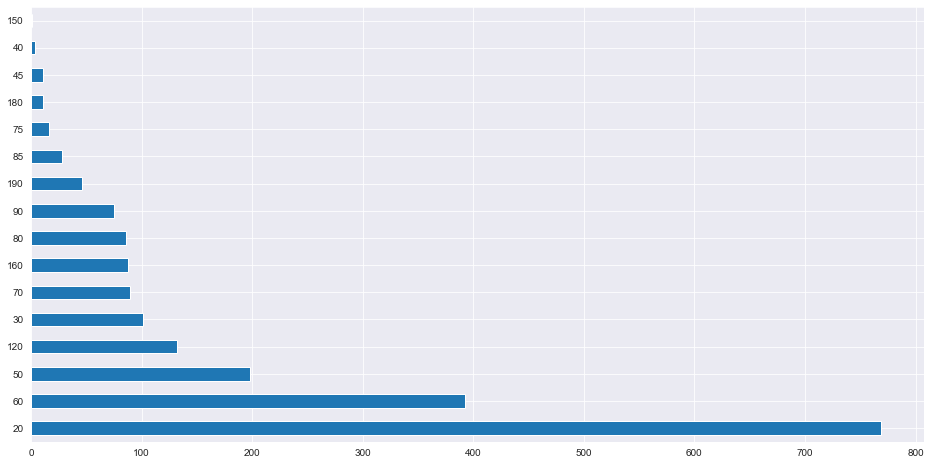

In [187]:
df['ms_subclass'].value_counts().plot(kind='barh',figsize=(16,8))

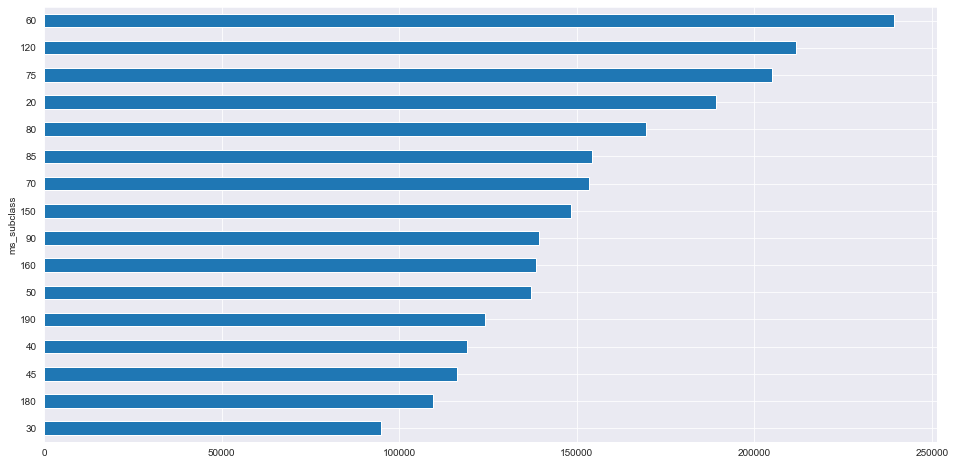

In [188]:
df.groupby('ms_subclass')['saleprice'].mean().sort_values().plot(kind='barh',figsize=(16,8))

It appears some correlation with saleprice.Most of the varibles had also been descirbed using other features in the dataset. Example if a house is unfinished, the overall condition will not be scored well. If the house is 2 storey high, the gr above sq feet will generally be high as well.

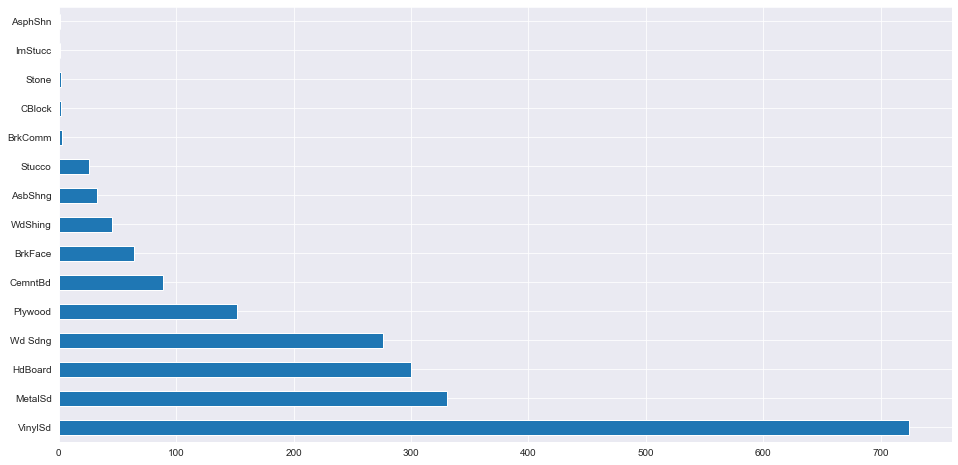

In [189]:
df['exterior_1st'].value_counts().plot(kind='barh',figsize=(16,8))

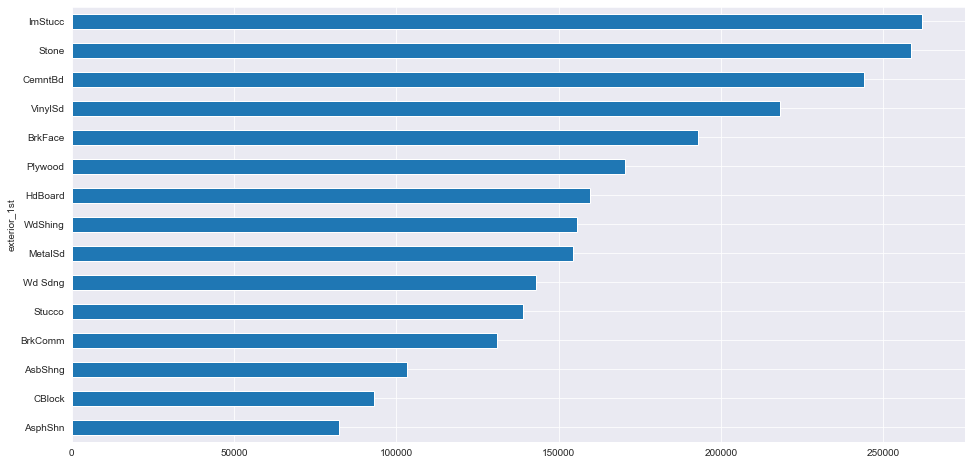

In [190]:
df.groupby('exterior_1st')['saleprice'].mean().sort_values().plot(kind='barh',figsize=(16,8))

Vinylsd with the high count of exterior and score 4th in mean sale price. Exterior 2 shares almost the same correlation towards saleprice.

In [191]:
df_train.corr()['lot_area'].sort_values(ascending=False).head(10)

lot_area                1.000000
1st_flr_sf              0.348123
land_contour_Low        0.337610
neighborhood_ClearCr    0.323803
total_living_area       0.315186
saleprice               0.303744
gr_liv_area             0.294542
fireplaces              0.276997
ms_zoning_RL            0.262154
bldg_type_1Fam          0.261576
Name: lot_area, dtype: float64

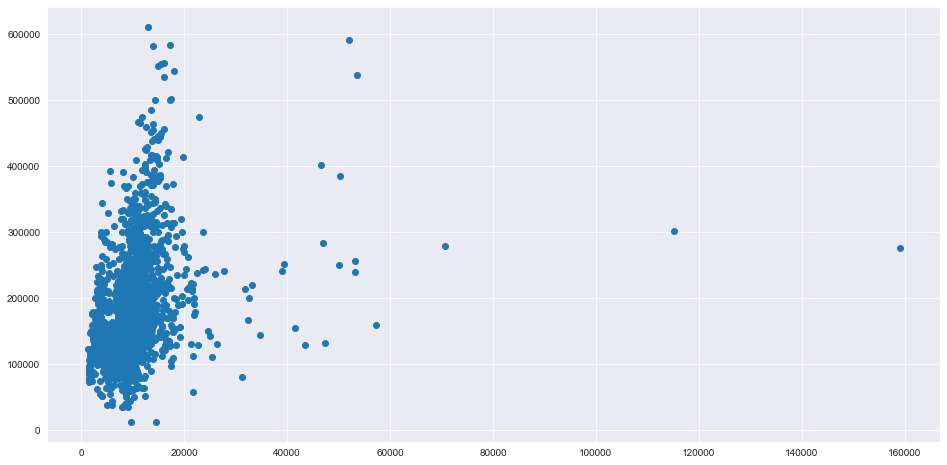

In [192]:
plt.figure(figsize=(16,8))
plt.scatter(x='lot_area',y='saleprice',data=df_train)

Most of the lot area are clustered with great variation in saleprice.

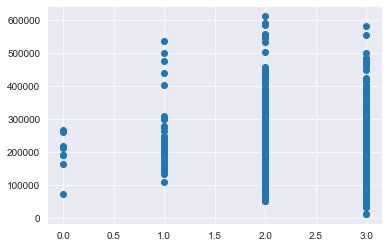

In [193]:
plt.scatter(df_train['lot_shape'],df_train['saleprice'])

In [194]:
df_train['lot_shape'].value_counts()

3    1295
2     691
1      55
0       8
Name: lot_shape, dtype: int64

Looking at the plot, most of the lot are regular size. The saleprice range from low to high for regular plot shape.

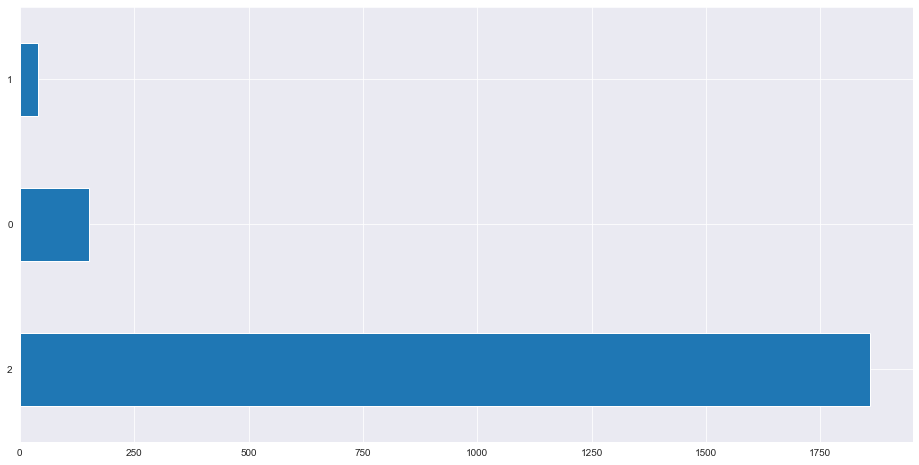

In [195]:
df['paved_drive'].value_counts().plot(kind='barh',figsize=(16,8))

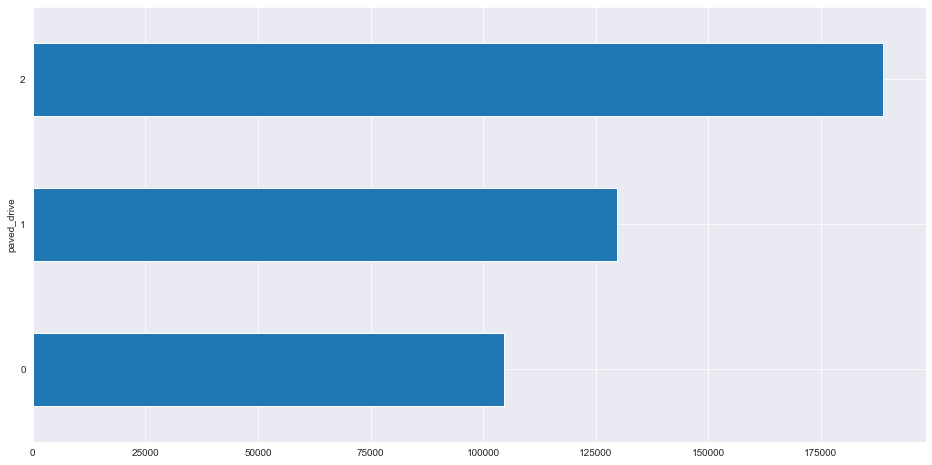

In [196]:
df.groupby('paved_drive')['saleprice'].mean().sort_values().plot(kind='barh',figsize=(16,8))

Most drive are paved. Hence the saleprice will be spread among them.

In [197]:
df_train.corr()['bsmtfin_type_1'].sort_values(ascending=False).head(10)

bsmtfin_type_1    1.000000
bsmtfin_sf_1      0.722999
bsmt_full_bath    0.592591
bsmt_qual         0.418575
year_built        0.374919
total_bsmt_sf     0.352348
bsmt_exposure     0.351158
saleprice         0.350728
overall_qual      0.290091
garage_yr_blt     0.289473
Name: bsmtfin_type_1, dtype: float64

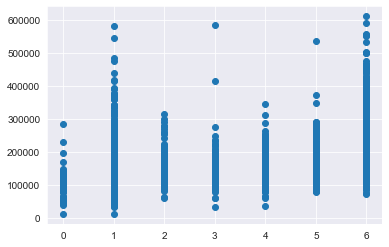

In [198]:
plt.scatter(x='bsmtfin_type_1',y='saleprice',data=df_train)

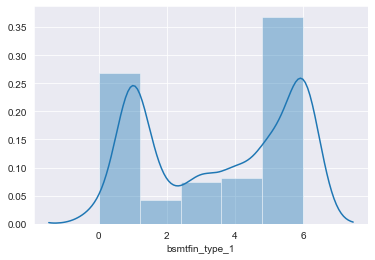

In [199]:
sns.distplot(df['bsmtfin_type_1'],bins=5)

Even though there is some correlation, this could be due to the distribution itself as it pulls up the correlation. 

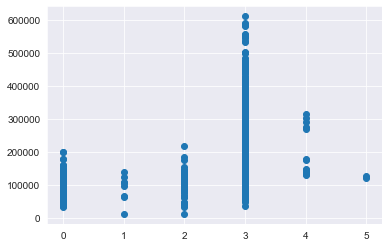

In [200]:
plt.scatter(x='garage_cond',y='saleprice',data=df_train)

In [201]:
df_train['garage_cond'].value_counts()

3    1866
0     114
2      47
4      12
1       8
5       2
Name: garage_cond, dtype: int64

Most of the sales are of quality 3. Hence it may not be a good predictor of saleprice.

Handpicked Features to be selected for further regression: <br>
total_living_area       0.825818<br>
overall_qual            0.803462<br>
garage_area             0.655097<br>
year_remod/add          0.550872<br>
garage_finish           0.558566<br>
full_bath               0.538225<br>
foundation_PConc        0.529500<br>
totrms_abvgrd           0.509775<br>
fireplace_qu            0.539484<br>
neighborhood_NridgHt    0.448639<br>
garage_type_Detchd      0.370280<br>
sale_type_New           0.360599<br>
garage_type_Attchd      0.358104<br>
foundation_CBlock       0.355768<br>
exterior_1st_VinylSd    0.342156<br>
mas_vnr_type_Stone      0.312137<br>

Building new model Train,test,split -> Scale -> Fit -> Score

In [202]:
new_features=['total_living_area', 'overall_qual', 'garage_area','year_remod/add','garage_finish', 'full_bath', 'fireplace_qu', 'totrms_abvgrd', 
       'neighborhood_NridgHt',
       'foundation_CBlock', 'foundation_PConc','garage_type_Attchd',
       'garage_type_Detchd',
       'sale_type_New',
       'exterior_1st_VinylSd', 'mas_vnr_type_Stone']

In [203]:
new_X=df_train[new_features]
new_y=df_train['saleprice']

In [204]:
new_X_train,new_X_test,new_y_train,new_y_test=train_test_split(new_X,new_y,random_state=42)

In [205]:
new_ss=StandardScaler()
new_ss.fit(new_X_train)
new_X_train=new_ss.transform(new_X_train)
new_X_test=new_ss.transform(new_X_test)

In [206]:
new_lr_scores=cross_val_score(lr,new_X_train,new_y_train,cv=10)
print(new_lr_scores.mean())

new_lasso_scores=cross_val_score(lasso,new_X_train,new_y_train,cv=10)
print(new_lasso_scores.mean())

new_ridge_scores=cross_val_score(ridge,new_X_train,new_y_train,cv=10)
print(new_ridge_scores.mean())

0.8320153790821173


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warni

0.8321413892464944
0.832134994047804


LinearRegression score:0.8320153790821173<br>
Lasso score=0.8321413892464944<br>
Ridge score=0.832134994047804<br>

The scores are very similar among the 3 models. May wish to use all 3 models to evaluate further on y_test.

In [207]:
lr.fit(new_X_train,new_y_train)
print('LinearRegression')
print(f'train score: {lr.score(new_X_train,new_y_train)}')
print(f'test score: {lr.score(new_X_test,new_y_test)}')
print(f'adjustedr2: {adjustedr2(new_X_test,lr.score(new_X_test,new_y_test))}')
lr_pred=lr.predict(new_X_test)
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(new_y_test, lr_pred))}')

LinearRegression
train score: 0.8413818702493949
test score: 0.8543408975977477
adjustedr2: 0.8496422168750943
RMSE: 30345.898114124415


In [208]:
lasso.fit(new_X_train,new_y_train)
print('Lasso')
print(f'train score: {lasso.score(new_X_train,new_y_train)}')
print(f'test score: {lasso.score(new_X_test,new_y_test)}')
print(f'adjustedr2: {adjustedr2(new_X_test,lasso.score(new_X_test,new_y_test))}')
lasso_pred=lasso.predict(new_X_test)
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(new_y_test, lasso_pred))}')

Lasso
train score: 0.8413702074821235
test score: 0.8543036221842831
adjustedr2: 0.8496037390289375
RMSE: 30349.780753525716


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [209]:
ridge.fit(new_X_train,new_y_train)
print('Ridge')
print(f'train score: {ridge.score(new_X_train,new_y_train)}')
print(f'test score: {ridge.score(new_X_test,new_y_test)}')
print(f'adjustedr2: {adjustedr2(new_X_test,ridge.score(new_X_test,new_y_test))}')
ridge_pred=ridge.predict(new_X_test)
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(new_y_test, ridge_pred))}')

Ridge
train score: 0.8413587203025538
test score: 0.8540634039328192
adjustedr2: 0.8493557718016198
RMSE: 30374.790190101157


The scores and RMSE are still very similar. Hence will be submitting 3 models to kaggle for further testing.

In [210]:
final_test=df_final_test[new_features]
final_test=new_ss.transform(final_test)

In [211]:
lr_pred=lr.predict(final_test)
df_final_test['saleprice']=lr_pred
lr_kaggle=df_final_test[['id','saleprice']]
lr_kaggle_export=lr_kaggle.to_csv(r'/Users/jiaxing/GA/classes-workarea/Project1234/Project2/lr_kaggle.csv',index=False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Kaggle score with linear 17 features: 35338.56457

In [212]:
lasso_pred=lasso.predict(final_test)
df_final_test['saleprice']=lasso_pred
lasso_kaggle=df_final_test[['id','saleprice']]
lasso_kaggle_export=lasso_kaggle.to_csv(r'/Users/jiaxing/GA/classes-workarea/Project1234/Project2/lasso_kaggle.csv',index=False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Kaggle score with lasso 17 features: 35322.76370

In [213]:
ridge_pred=ridge.predict(final_test)
df_final_test['saleprice']=ridge_pred
ridge_kaggle=df_final_test[['id','saleprice']]
ridge_kaggle_export=ridge_kaggle.to_csv(r'/Users/jiaxing/GA/classes-workarea/Project1234/Project2/ridge_kaggle.csv',index=False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Kaggle score with ridge 17 features: 35388.54525

4 models had been produced so far. The 1st model is done with lasso resulting in a comples model with 106 features. The subsequent 3 models are done after feature engineering and anayalising the correlation. The score is not as good but the model is simpler.<br>

Will be interested to see how lasso will perform after feature engineering and dropping the features with high correlation. Also at the same time to limit features to only a maximum of 25 by increasing lambda.

In [214]:
final_features=[col for col in df_train.columns if (col !='2nd_flr_sf' and col !='1st_flr_sf' and col !='total_bsmt_sf' and col !='gr_liv_area' and col !='garage_cars' and col !='id' and col !='saleprice' and col !='garage_yr_blt' and col !='dataset')]
final_X=df_train[final_features]
final_y=df_train['saleprice']

In [215]:
final_X_train,final_X_test,final_y_train,final_y_test=train_test_split(final_X,final_y,random_state=42)

Scaing out X train and X test set.

In [216]:
ss=StandardScaler()
ss.fit(final_X_train)
final_X_train=ss.transform(final_X_train)
final_X_test=ss.transform(final_X_test)

In [217]:
lr_scores=cross_val_score(lr,final_X_train,final_y_train,cv=10)
lr_scores.mean()

-1.4033775282462825e+25

In [218]:
lasso_scores=cross_val_score(lasso,final_X_train,final_y_train,cv=10)
lasso_scores.mean()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warni

0.9040325745056176

In [219]:
ridge_scores=cross_val_score(ridge,final_X_train,final_y_train,cv=10)
ridge_scores.mean()

0.8949413511255451

Lasso is still the best scored model.

In [220]:
lasso.fit(final_X_train,final_y_train)
lasso.score(final_X_train,final_y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9237711317183405

In [221]:
lasso.score(final_X_test,final_y_test)

0.9171120431691974

In [222]:
lasso.alpha_

488.02515836544336

In [223]:
final_lassodf=pd.DataFrame(lasso.coef_,index=final_features,columns=['Coeff'])
final_lassodf[final_lassodf['Coeff']!=0]['Coeff'].count()

100

With the optimal alpha of ~ 488, the number of features are 100. 

In [224]:
score=[]
no_of_features=[]
error=[]
for a in np.logspace(0, 5, 300):
    lasso_test=Lasso(alpha=[a])
    lasso_test.fit(final_X_train,final_y_train)
    final_pred=lasso_test.predict(final_X_train)
    error.append(np.sqrt(metrics.mean_squared_error(final_y_train, final_pred)))
    score.append(lasso_test.score(final_X_train,final_y_train))
    test_lassodf=pd.DataFrame(lasso_test.coef_,index=final_features,columns=['Coeff'])
    no_of_features.append(test_lassodf[test_lassodf['Coeff']!=0]['Coeff'].count())

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16574329792.275024, tolerance: 963425504.0233434
  positive)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16565847043.198975, tolerance: 963425504.0233434
  positive)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16566858957.659302, tolerance: 963425504.0233434
  positive)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number o

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1204098943.472046, tolerance: 963425504.0233434
  positive)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207913336.668579, tolerance: 963425504.0233434
  positive)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2943038567.15625, tolerance: 963425504.0233434
  positive)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

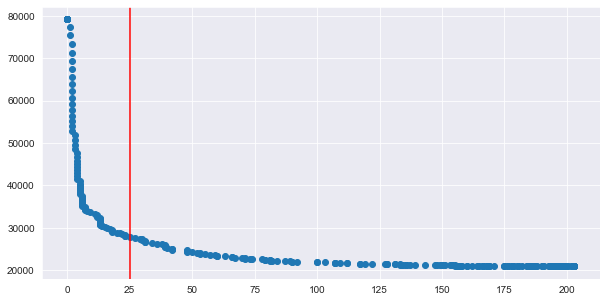

In [225]:
plt.figure(figsize=(10,5))
plt.scatter(x=no_of_features,y=error)
plt.axvline(x=25,c='r')

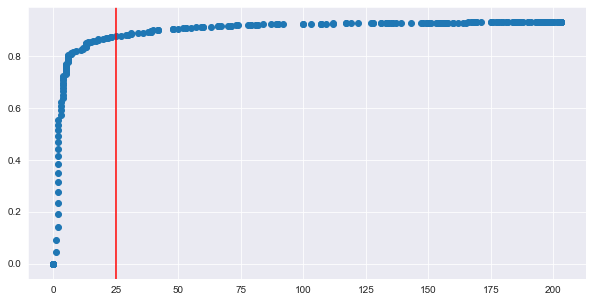

In [226]:
plt.figure(figsize=(10,5))
plt.scatter(x=no_of_features,y=score)
plt.axvline(x=25,c='r')

Attempting to increment the alpha on lasso model so features will be dropped with only 25 left. Above plot shows that as number of features increases, the score will be better but more complex moedel. 

In [227]:
lasso_final=Lasso(alpha=4000)
lasso_final.fit(final_X_train,final_y_train)
print(f'Train score: {lasso_final.score(final_X_train,final_y_train)}')
print(f'Test score: {lasso_final.score(final_X_test,final_y_test)}')
final_lassodf=pd.DataFrame(lasso_final.coef_,index=final_features,columns=['Coeff'])
final_lassodf[final_lassodf['Coeff']!=0]['Coeff'].count()

Train score: 0.8760765191385039
Test score: 0.881117199879411


25

In [228]:
final_model=final_lassodf[final_lassodf['Coeff']!=0]

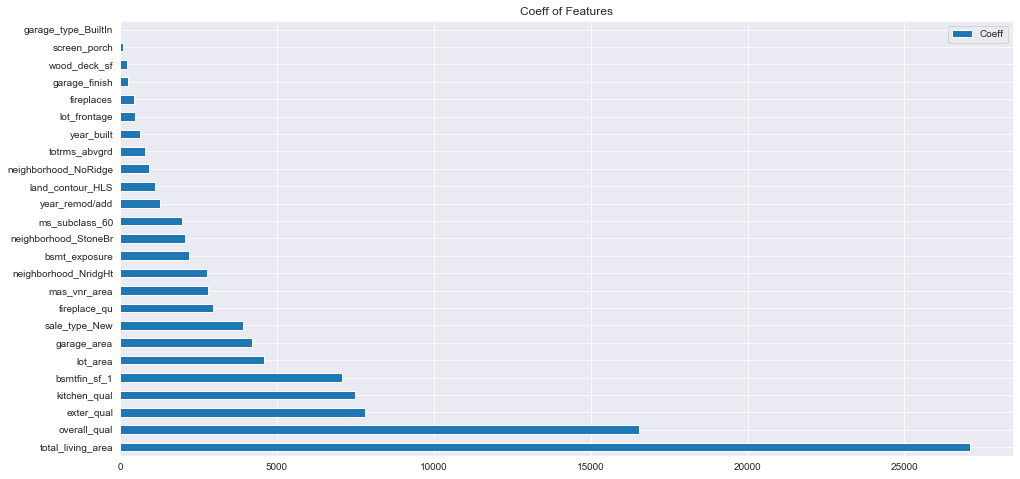

In [229]:
final_model.sort_values(by='Coeff', ascending=False).plot(kind='barh',figsize=(16,8), title='Coeff of Features')

In [230]:
new_df_final_test=df_final_test[final_features]

In [231]:
new_df_final_test=ss.transform(new_df_final_test)

final_predict=lasso_final.predict(new_df_final_test)

In [232]:
df_final_test['saleprice']=final_predict

final_kaggle=df_final_test[['id','saleprice']]


final_kaggle_export=final_kaggle.to_csv(r'/Users/jiaxing/GA/classes-workarea/Project1234/Project2/final_kaggle.csv',index=False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Kaggle score with 25 features: 32961.87211

### Conclusions

To create models with a balance of great predictive values and simple features will require feature engineering and understanding of the features.